- Weight constraints provide an approach to reduce the overfitting of a deep learning neural network model on the training data and improve the performance of the model on new data
- There are multiple types of weight constraints, such as maximum and unit vector norms
- The constraints are specified per-layer, but applied and enforced per-node within the layer
- Using a constraint generally involves setting the kernel_constraint argument on the layer for the input weights and the bias_constraint for the bias weights
- Different types of weight constraints supported by keras API are:
    - Maximum norm (max_norm) : to force weights to have a magnitude at or below a given limit
    - Non-negative norm (non_neg) : to force weights to have a positive magnitude
    - Unit norm (unit_norm) : to force weights to have a magnitude of 1.0
    - Min-Max norm (min_max_norm) : to force weights to have a magnitude between a range

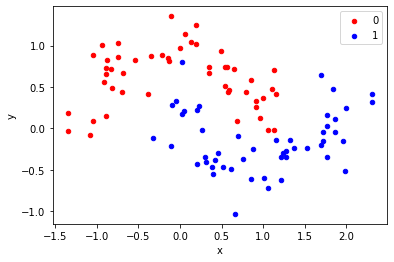

In [6]:
# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [7]:
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

The model will have one hidden layer with more nodes than may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits.

In [8]:
trainX.shape

(30, 2)

In [9]:
testX.shape

(70, 2)

In [10]:
trainy.shape

(30,)

In [11]:
testy.shape

(70,)

In [14]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot

Epoch 1/4000
1/1 [==============================] - 0s 198ms/step - loss: 0.7148 - accuracy: 0.1333 - val_loss: 0.7000 - val_accuracy: 0.3286
Epoch 2/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.6983 - accuracy: 0.4667 - val_loss: 0.6895 - val_accuracy: 0.4286
Epoch 3/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.6822 - accuracy: 0.6333 - val_loss: 0.6794 - val_accuracy: 0.6571
Epoch 4/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.6666 - accuracy: 0.8333 - val_loss: 0.6697 - val_accuracy: 0.6714
Epoch 5/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.6514 - accuracy: 0.8333 - val_loss: 0.6603 - val_accuracy: 0.6714
Epoch 6/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.6366 - accuracy: 0.8333 - val_loss: 0.6512 - val_accuracy: 0.6714
Epoch 7/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.6222 - accuracy: 0.8333 - val_loss: 0.6424 - val_accuracy: 0.6714
Epoch 8/4000

1/1 [==============================] - 0s 18ms/step - loss: 0.2534 - accuracy: 0.9000 - val_loss: 0.4605 - val_accuracy: 0.7286
Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2507 - accuracy: 0.9000 - val_loss: 0.4596 - val_accuracy: 0.7286
Epoch 60/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.2482 - accuracy: 0.9000 - val_loss: 0.4587 - val_accuracy: 0.7286
Epoch 61/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.2458 - accuracy: 0.9000 - val_loss: 0.4578 - val_accuracy: 0.7286
Epoch 62/4000
1/1 [==============================] - ETA: 0s - loss: 0.2434 - accuracy: 0.90 - 0s 17ms/step - loss: 0.2434 - accuracy: 0.9000 - val_loss: 0.4570 - val_accuracy: 0.7286
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2412 - accuracy: 0.9000 - val_loss: 0.4561 - val_accuracy: 0.7286
Epoch 64/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.2390 - accuracy: 0.9000 - val_loss: 0.4553 -

Epoch 115/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1815 - accuracy: 0.9000 - val_loss: 0.4192 - val_accuracy: 0.7429
Epoch 116/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.1808 - accuracy: 0.9333 - val_loss: 0.4184 - val_accuracy: 0.7429
Epoch 117/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1801 - accuracy: 0.9333 - val_loss: 0.4176 - val_accuracy: 0.7429
Epoch 118/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.1795 - accuracy: 0.9333 - val_loss: 0.4168 - val_accuracy: 0.7429
Epoch 119/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.1789 - accuracy: 0.9333 - val_loss: 0.4160 - val_accuracy: 0.7429
Epoch 120/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1782 - accuracy: 0.9333 - val_loss: 0.4153 - val_accuracy: 0.7429
Epoch 121/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.1776 - accuracy: 0.9333 - val_loss: 0.4145 - val_accuracy: 0.7429

Epoch 172/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1542 - accuracy: 0.9667 - val_loss: 0.3811 - val_accuracy: 0.8286
Epoch 173/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.1539 - accuracy: 0.9667 - val_loss: 0.3806 - val_accuracy: 0.8286
Epoch 174/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.1536 - accuracy: 0.9667 - val_loss: 0.3802 - val_accuracy: 0.8286
Epoch 175/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1532 - accuracy: 0.9667 - val_loss: 0.3798 - val_accuracy: 0.8286
Epoch 176/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.1529 - accuracy: 0.9667 - val_loss: 0.3795 - val_accuracy: 0.8286
Epoch 177/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1526 - accuracy: 0.9667 - val_loss: 0.3791 - val_accuracy: 0.8286
Epoch 178/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.1523 - accuracy: 0.9667 - val_loss: 0.3787 - val_accuracy: 0.8286

1/1 [==============================] - 0s 17ms/step - loss: 0.1414 - accuracy: 0.9667 - val_loss: 0.3713 - val_accuracy: 0.8143
Epoch 228/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1412 - accuracy: 0.9667 - val_loss: 0.3713 - val_accuracy: 0.8143
Epoch 229/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.1411 - accuracy: 0.9667 - val_loss: 0.3713 - val_accuracy: 0.8143
Epoch 230/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1409 - accuracy: 0.9667 - val_loss: 0.3714 - val_accuracy: 0.8143
Epoch 231/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.1408 - accuracy: 0.9667 - val_loss: 0.3714 - val_accuracy: 0.8143
Epoch 232/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.1407 - accuracy: 0.9667 - val_loss: 0.3715 - val_accuracy: 0.8143
Epoch 233/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.1405 - accuracy: 0.9667 - val_loss: 0.3715 - val_accuracy: 0.8143
Epoch 234/4000

1/1 [==============================] - 0s 17ms/step - loss: 0.1355 - accuracy: 0.9667 - val_loss: 0.3745 - val_accuracy: 0.8143
Epoch 284/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.1354 - accuracy: 0.9667 - val_loss: 0.3746 - val_accuracy: 0.8143
Epoch 285/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.1353 - accuracy: 0.9667 - val_loss: 0.3747 - val_accuracy: 0.8143
Epoch 286/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.1352 - accuracy: 0.9667 - val_loss: 0.3747 - val_accuracy: 0.8143
Epoch 287/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1351 - accuracy: 0.9667 - val_loss: 0.3748 - val_accuracy: 0.8143
Epoch 288/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.1351 - accuracy: 0.9667 - val_loss: 0.3748 - val_accuracy: 0.8143
Epoch 289/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1350 - accuracy: 0.9667 - val_loss: 0.3749 - val_accuracy: 0.8143
Epoch 290/4000

1/1 [==============================] - 0s 18ms/step - loss: 0.1310 - accuracy: 0.9667 - val_loss: 0.3758 - val_accuracy: 0.8286
Epoch 340/4000
1/1 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 0.96 - 0s 16ms/step - loss: 0.1309 - accuracy: 0.9667 - val_loss: 0.3758 - val_accuracy: 0.8286
Epoch 341/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.1308 - accuracy: 0.9667 - val_loss: 0.3758 - val_accuracy: 0.8286
Epoch 342/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1307 - accuracy: 0.9667 - val_loss: 0.3757 - val_accuracy: 0.8286
Epoch 343/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.1306 - accuracy: 0.9667 - val_loss: 0.3757 - val_accuracy: 0.8286
Epoch 344/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.1305 - accuracy: 0.9667 - val_loss: 0.3757 - val_accuracy: 0.8286
Epoch 345/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1305 - accuracy: 0.9667 - val_loss: 0.

1/1 [==============================] - 0s 23ms/step - loss: 0.1257 - accuracy: 0.9667 - val_loss: 0.3725 - val_accuracy: 0.8429
Epoch 396/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1256 - accuracy: 0.9667 - val_loss: 0.3724 - val_accuracy: 0.8429
Epoch 397/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.1255 - accuracy: 0.9667 - val_loss: 0.3723 - val_accuracy: 0.8429
Epoch 398/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1254 - accuracy: 0.9667 - val_loss: 0.3722 - val_accuracy: 0.8429
Epoch 399/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1253 - accuracy: 0.9667 - val_loss: 0.3721 - val_accuracy: 0.8429
Epoch 400/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1252 - accuracy: 0.9667 - val_loss: 0.3720 - val_accuracy: 0.8429
Epoch 401/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.1251 - accuracy: 0.9667 - val_loss: 0.3718 - val_accuracy: 0.8429
Epoch 402/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1182 - accuracy: 0.9667 - val_loss: 0.3594 - val_accuracy: 0.8429
Epoch 453/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.1180 - accuracy: 0.9667 - val_loss: 0.3590 - val_accuracy: 0.8429
Epoch 454/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.1179 - accuracy: 0.9667 - val_loss: 0.3586 - val_accuracy: 0.8429
Epoch 455/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.1177 - accuracy: 0.9667 - val_loss: 0.3582 - val_accuracy: 0.8429
Epoch 456/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1175 - accuracy: 0.9667 - val_loss: 0.3578 - val_accuracy: 0.8429
Epoch 457/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.1173 - accuracy: 0.9667 - val_loss: 0.3574 - val_accuracy: 0.8429
Epoch 458/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.1171 - accuracy: 0.9667 - val_loss: 0.3571 - val_accuracy: 0.8429
Epoch 459/4000

1/1 [==============================] - 0s 21ms/step - loss: 0.1059 - accuracy: 0.9667 - val_loss: 0.3397 - val_accuracy: 0.8429
Epoch 510/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.1056 - accuracy: 0.9667 - val_loss: 0.3393 - val_accuracy: 0.8429
Epoch 511/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.1054 - accuracy: 0.9667 - val_loss: 0.3390 - val_accuracy: 0.8429
Epoch 512/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.1051 - accuracy: 0.9667 - val_loss: 0.3386 - val_accuracy: 0.8429
Epoch 513/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.1049 - accuracy: 0.9667 - val_loss: 0.3382 - val_accuracy: 0.8429
Epoch 514/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.1046 - accuracy: 0.9667 - val_loss: 0.3378 - val_accuracy: 0.8429
Epoch 515/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.1044 - accuracy: 0.9667 - val_loss: 0.3374 - val_accuracy: 0.8429
Epoch 516/4000

Epoch 566/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0917 - accuracy: 0.9667 - val_loss: 0.3145 - val_accuracy: 0.8429
Epoch 567/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0915 - accuracy: 0.9667 - val_loss: 0.3141 - val_accuracy: 0.8429
Epoch 568/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0912 - accuracy: 0.9667 - val_loss: 0.3137 - val_accuracy: 0.8429
Epoch 569/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0909 - accuracy: 0.9667 - val_loss: 0.3134 - val_accuracy: 0.8429
Epoch 570/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0907 - accuracy: 0.9667 - val_loss: 0.3130 - val_accuracy: 0.8429
Epoch 571/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0904 - accuracy: 0.9667 - val_loss: 0.3126 - val_accuracy: 0.8429
Epoch 572/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0902 - accuracy: 0.9667 - val_loss: 0.3122 - val_accuracy: 0.8429

1/1 [==============================] - 0s 16ms/step - loss: 0.0776 - accuracy: 0.9667 - val_loss: 0.2912 - val_accuracy: 0.9000
Epoch 623/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0773 - accuracy: 0.9667 - val_loss: 0.2907 - val_accuracy: 0.9000
Epoch 624/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0771 - accuracy: 0.9667 - val_loss: 0.2903 - val_accuracy: 0.9000
Epoch 625/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0769 - accuracy: 0.9667 - val_loss: 0.2900 - val_accuracy: 0.9000
Epoch 626/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0766 - accuracy: 0.9667 - val_loss: 0.2897 - val_accuracy: 0.9000
Epoch 627/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0764 - accuracy: 0.9667 - val_loss: 0.2893 - val_accuracy: 0.9000
Epoch 628/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0761 - accuracy: 0.9667 - val_loss: 0.2888 - val_accuracy: 0.9000
Epoch 629/4000

Epoch 679/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0639 - accuracy: 0.9667 - val_loss: 0.2698 - val_accuracy: 0.9143
Epoch 680/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0637 - accuracy: 0.9667 - val_loss: 0.2695 - val_accuracy: 0.9143
Epoch 681/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0635 - accuracy: 0.9667 - val_loss: 0.2692 - val_accuracy: 0.9143
Epoch 682/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0632 - accuracy: 0.9667 - val_loss: 0.2688 - val_accuracy: 0.9286
Epoch 683/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0630 - accuracy: 0.9667 - val_loss: 0.2684 - val_accuracy: 0.9286
Epoch 684/4000
1/1 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 0.96 - 0s 15ms/step - loss: 0.0628 - accuracy: 0.9667 - val_loss: 0.2681 - val_accuracy: 0.9286
Epoch 685/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0626 - accuracy: 0.9667

1/1 [==============================] - 0s 17ms/step - loss: 0.0516 - accuracy: 0.9667 - val_loss: 0.2551 - val_accuracy: 0.9286
Epoch 736/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0514 - accuracy: 0.9667 - val_loss: 0.2549 - val_accuracy: 0.9286
Epoch 737/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0512 - accuracy: 0.9667 - val_loss: 0.2548 - val_accuracy: 0.9286
Epoch 738/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0510 - accuracy: 0.9667 - val_loss: 0.2546 - val_accuracy: 0.9286
Epoch 739/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0508 - accuracy: 0.9667 - val_loss: 0.2544 - val_accuracy: 0.9286
Epoch 740/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0506 - accuracy: 0.9667 - val_loss: 0.2541 - val_accuracy: 0.9286
Epoch 741/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0504 - accuracy: 0.9667 - val_loss: 0.2540 - val_accuracy: 0.9286
Epoch 742/4000

Epoch 791/4000
1/1 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 1.00 - 0s 17ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.2463 - val_accuracy: 0.9286
Epoch 792/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 0.2462 - val_accuracy: 0.9286
Epoch 793/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0410 - accuracy: 1.0000 - val_loss: 0.2460 - val_accuracy: 0.9286
Epoch 794/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 0.2459 - val_accuracy: 0.9286
Epoch 795/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.2458 - val_accuracy: 0.9286
Epoch 796/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.2457 - val_accuracy: 0.9286
Epoch 797/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0403 - accuracy: 1.0000

1/1 [==============================] - 0s 18ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.2419 - val_accuracy: 0.9286
Epoch 848/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.2418 - val_accuracy: 0.9286
Epoch 849/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 0.2418 - val_accuracy: 0.9286
Epoch 850/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.9286
Epoch 851/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.9286
Epoch 852/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.9286
Epoch 853/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.9286
Epoch 854/4000

Epoch 904/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 0.2419 - val_accuracy: 0.9286
Epoch 905/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 0.2420 - val_accuracy: 0.9286
Epoch 906/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.2420 - val_accuracy: 0.9286
Epoch 907/4000
1/1 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 1.00 - 0s 19ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.2420 - val_accuracy: 0.9286
Epoch 908/4000
1/1 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 1.00 - 0s 17ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 0.2421 - val_accuracy: 0.9286
Epoch 909/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.2421 - val_accuracy: 0.9286
Epoch 910/4000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 20ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.2453 - val_accuracy: 0.9429
Epoch 960/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0210 - accuracy: 1.0000 - val_loss: 0.2454 - val_accuracy: 0.9429
Epoch 961/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.2454 - val_accuracy: 0.9429
Epoch 962/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.2455 - val_accuracy: 0.9429
Epoch 963/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.2456 - val_accuracy: 0.9429
Epoch 964/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.2457 - val_accuracy: 0.9429
Epoch 965/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.2458 - val_accuracy: 0.9429
Epoch 966/4000

1/1 [==============================] - 0s 17ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.2514 - val_accuracy: 0.9429
Epoch 1016/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.2516 - val_accuracy: 0.9429
Epoch 1017/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.2517 - val_accuracy: 0.9429
Epoch 1018/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.2518 - val_accuracy: 0.9429
Epoch 1019/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.2519 - val_accuracy: 0.9429
Epoch 1020/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.2521 - val_accuracy: 0.9429
Epoch 1021/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.2522 - val_accuracy: 0.9429
Epoch 10

1/1 [==============================] - 0s 17ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.2597 - val_accuracy: 0.9429
Epoch 1071/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.2598 - val_accuracy: 0.9429
Epoch 1072/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.2600 - val_accuracy: 0.9429
Epoch 1073/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.2602 - val_accuracy: 0.9429
Epoch 1074/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.2603 - val_accuracy: 0.9429
Epoch 1075/4000
1/1 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 1.00 - 0s 16ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.2605 - val_accuracy: 0.9429
Epoch 1076/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0138 - accuracy: 1.0000 - val_lo

Epoch 1126/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.2685 - val_accuracy: 0.9429
Epoch 1127/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.2686 - val_accuracy: 0.9429
Epoch 1128/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.2688 - val_accuracy: 0.9429
Epoch 1129/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.2689 - val_accuracy: 0.9429
Epoch 1130/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.2691 - val_accuracy: 0.9429
Epoch 1131/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.2693 - val_accuracy: 0.9429
Epoch 1132/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.2694 - val_accuracy:

1/1 [==============================] - 0s 19ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2774 - val_accuracy: 0.9429
Epoch 1183/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2775 - val_accuracy: 0.9429
Epoch 1184/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2777 - val_accuracy: 0.9429
Epoch 1185/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.2779 - val_accuracy: 0.9429
Epoch 1186/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.2780 - val_accuracy: 0.9429
Epoch 1187/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.2782 - val_accuracy: 0.9429
Epoch 1188/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.2783 - val_accuracy: 0.9429
Epoch 11

1/1 [==============================] - 0s 17ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2860 - val_accuracy: 0.9286
Epoch 1240/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2861 - val_accuracy: 0.9286
Epoch 1241/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2863 - val_accuracy: 0.9286
Epoch 1242/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2864 - val_accuracy: 0.9286
Epoch 1243/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2866 - val_accuracy: 0.9286
Epoch 1244/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2868 - val_accuracy: 0.9286
Epoch 1245/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.2869 - val_accuracy: 0.9286
Epoch 12

Epoch 1295/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.2950 - val_accuracy: 0.9286
Epoch 1296/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.2951 - val_accuracy: 0.9286
Epoch 1297/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.2952 - val_accuracy: 0.9286
Epoch 1298/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2954 - val_accuracy: 0.9286
Epoch 1299/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2955 - val_accuracy: 0.9286
Epoch 1300/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2957 - val_accuracy: 0.9286
Epoch 1301/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2959 - val_accuracy:

1/1 [==============================] - 0s 17ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3026 - val_accuracy: 0.9286
Epoch 1351/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3028 - val_accuracy: 0.9286
Epoch 1352/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3029 - val_accuracy: 0.9286
Epoch 1353/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3031 - val_accuracy: 0.9286
Epoch 1354/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3032 - val_accuracy: 0.9286
Epoch 1355/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.3034 - val_accuracy: 0.9286
Epoch 1356/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.3035 - val_accuracy: 0.9286
Epoch 13

Epoch 1407/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3114 - val_accuracy: 0.9286
Epoch 1408/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3115 - val_accuracy: 0.9286
Epoch 1409/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3116 - val_accuracy: 0.9286
Epoch 1410/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.3117 - val_accuracy: 0.9286
Epoch 1411/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3118 - val_accuracy: 0.9286
Epoch 1412/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3120 - val_accuracy: 0.9286
Epoch 1413/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3121 - val_accuracy:

1/1 [==============================] - 0s 18ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3184 - val_accuracy: 0.9286
Epoch 1464/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3186 - val_accuracy: 0.9286
Epoch 1465/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3187 - val_accuracy: 0.9286
Epoch 1466/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3188 - val_accuracy: 0.9286
Epoch 1467/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3189 - val_accuracy: 0.9286
Epoch 1468/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3190 - val_accuracy: 0.9286
Epoch 1469/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3191 - val_accuracy: 0.9286
Epoch 14

1/1 [==============================] - 0s 20ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3252 - val_accuracy: 0.9286
Epoch 1520/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3254 - val_accuracy: 0.9286
Epoch 1521/4000
1/1 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 1.00 - 0s 17ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3255 - val_accuracy: 0.9286
Epoch 1522/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3256 - val_accuracy: 0.9286
Epoch 1523/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3257 - val_accuracy: 0.9286
Epoch 1524/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3259 - val_accuracy: 0.9286
Epoch 1525/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0039 - accuracy: 1.0000 - val_lo

1/1 [==============================] - 0s 19ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3319 - val_accuracy: 0.9286
Epoch 1575/4000
1/1 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 1.00 - 0s 20ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3320 - val_accuracy: 0.9286
Epoch 1576/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3321 - val_accuracy: 0.9286
Epoch 1577/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3322 - val_accuracy: 0.9286
Epoch 1578/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3324 - val_accuracy: 0.9286
Epoch 1579/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3325 - val_accuracy: 0.9286
Epoch 1580/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0035 - accuracy: 1.0000 - val_lo

1/1 [==============================] - 0s 16ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3384 - val_accuracy: 0.9286
Epoch 1631/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3385 - val_accuracy: 0.9286
Epoch 1632/4000
1/1 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.00 - 0s 17ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3386 - val_accuracy: 0.9286
Epoch 1633/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.9286
Epoch 1634/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3389 - val_accuracy: 0.9286
Epoch 1635/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3390 - val_accuracy: 0.9286
Epoch 1636/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0031 - accuracy: 1.0000 - val_lo

Epoch 1687/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3448 - val_accuracy: 0.9286
Epoch 1688/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3449 - val_accuracy: 0.9286
Epoch 1689/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3451 - val_accuracy: 0.9286
Epoch 1690/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3452 - val_accuracy: 0.9286
Epoch 1691/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3453 - val_accuracy: 0.9286
Epoch 1692/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3454 - val_accuracy: 0.9286
Epoch 1693/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3455 - val_accuracy:

Epoch 1743/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3510 - val_accuracy: 0.9286
Epoch 1744/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3511 - val_accuracy: 0.9286
Epoch 1745/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3512 - val_accuracy: 0.9286
Epoch 1746/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3513 - val_accuracy: 0.9286
Epoch 1747/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3514 - val_accuracy: 0.9286
Epoch 1748/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3515 - val_accuracy: 0.9286
Epoch 1749/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3516 - val_accuracy:

Epoch 1799/4000
1/1 [==============================] - 0s 15ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3569 - val_accuracy: 0.9286
Epoch 1800/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3570 - val_accuracy: 0.9286
Epoch 1801/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3571 - val_accuracy: 0.9286
Epoch 1802/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3573 - val_accuracy: 0.9286
Epoch 1803/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3574 - val_accuracy: 0.9286
Epoch 1804/4000
1/1 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.00 - 0s 18ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3575 - val_accuracy: 0.9286
Epoch 1805/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0023 - accuracy:

1/1 [==============================] - 0s 18ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3630 - val_accuracy: 0.9286
Epoch 1856/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3631 - val_accuracy: 0.9286
Epoch 1857/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3632 - val_accuracy: 0.9286
Epoch 1858/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.9286
Epoch 1859/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3634 - val_accuracy: 0.9286
Epoch 1860/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3635 - val_accuracy: 0.9286
Epoch 1861/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3636 - val_accuracy: 0.9286
Epoch 18

1/1 [==============================] - 0s 17ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3686 - val_accuracy: 0.9286
Epoch 1912/4000
1/1 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.00 - 0s 16ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3686 - val_accuracy: 0.9286
Epoch 1913/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3687 - val_accuracy: 0.9286
Epoch 1914/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3688 - val_accuracy: 0.9286
Epoch 1915/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3689 - val_accuracy: 0.9286
Epoch 1916/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3690 - val_accuracy: 0.9286
Epoch 1917/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0019 - accuracy: 1.0000 - val_lo

1/1 [==============================] - 0s 18ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3738 - val_accuracy: 0.9286
Epoch 1968/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3740 - val_accuracy: 0.9286
Epoch 1969/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3741 - val_accuracy: 0.9286
Epoch 1970/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3742 - val_accuracy: 0.9286
Epoch 1971/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3742 - val_accuracy: 0.9286
Epoch 1972/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3743 - val_accuracy: 0.9286
Epoch 1973/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3744 - val_accuracy: 0.9286
Epoch 19

1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3790 - val_accuracy: 0.9286
Epoch 2024/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3791 - val_accuracy: 0.9286
Epoch 2025/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3792 - val_accuracy: 0.9286
Epoch 2026/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3793 - val_accuracy: 0.9286
Epoch 2027/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3794 - val_accuracy: 0.9286
Epoch 2028/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3795 - val_accuracy: 0.9286
Epoch 2029/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3796 - val_accuracy: 0.9286
Epoch 20

Epoch 2079/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3840 - val_accuracy: 0.9286
Epoch 2080/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3841 - val_accuracy: 0.9286
Epoch 2081/4000
1/1 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 0s 16ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3842 - val_accuracy: 0.9286
Epoch 2082/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3843 - val_accuracy: 0.9286
Epoch 2083/4000
1/1 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 0s 19ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3844 - val_accuracy: 0.9286
Epoch 2084/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3845 - val_accuracy: 0.9286
Epoch 2085/4000
1/1 [==============================]

1/1 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3889 - val_accuracy: 0.9286
Epoch 2135/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3890 - val_accuracy: 0.9286
Epoch 2136/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3891 - val_accuracy: 0.9286
Epoch 2137/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3892 - val_accuracy: 0.9286
Epoch 2138/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3892 - val_accuracy: 0.9286
Epoch 2139/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3893 - val_accuracy: 0.9286
Epoch 2140/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3894 - val_accuracy: 0.9286
Epoch 21

1/1 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3937 - val_accuracy: 0.9286
Epoch 2190/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3938 - val_accuracy: 0.9286
Epoch 2191/4000
1/1 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.00 - 0s 18ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3938 - val_accuracy: 0.9286
Epoch 2192/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.9286
Epoch 2193/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3940 - val_accuracy: 0.9286
Epoch 2194/4000
1/1 [==============================] - 0s 18ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3941 - val_accuracy: 0.9286
Epoch 2195/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0012 - accuracy: 1.0000 - val_lo

1/1 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3983 - val_accuracy: 0.9286
Epoch 2246/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3984 - val_accuracy: 0.9286
Epoch 2247/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3984 - val_accuracy: 0.9286
Epoch 2248/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3985 - val_accuracy: 0.9286
Epoch 2249/4000
1/1 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.00 - 0s 18ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3986 - val_accuracy: 0.9286
Epoch 2250/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3987 - val_accuracy: 0.9286
Epoch 2251/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000 - val_lo

1/1 [==============================] - 0s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4027 - val_accuracy: 0.9286
Epoch 2301/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4028 - val_accuracy: 0.9286
Epoch 2302/4000
1/1 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4029 - val_accuracy: 0.9286
Epoch 2303/4000
1/1 [==============================] - 0s 20ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4030 - val_accuracy: 0.9286
Epoch 2304/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4030 - val_accuracy: 0.9286
Epoch 2305/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4031 - val_accuracy: 0.9286
Epoch 2306/4000
1/1 [==============================] - 0s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4032 - val_accuracy: 0.9286
Epoch 23

Epoch 2356/4000
1/1 [==============================] - 0s 21ms/step - loss: 9.8503e-04 - accuracy: 1.0000 - val_loss: 0.4071 - val_accuracy: 0.9286
Epoch 2357/4000
1/1 [==============================] - ETA: 0s - loss: 9.8381e-04 - accuracy: 1.00 - 0s 17ms/step - loss: 9.8381e-04 - accuracy: 1.0000 - val_loss: 0.4072 - val_accuracy: 0.9286
Epoch 2358/4000
1/1 [==============================] - 0s 17ms/step - loss: 9.8250e-04 - accuracy: 1.0000 - val_loss: 0.4073 - val_accuracy: 0.9286
Epoch 2359/4000
1/1 [==============================] - 0s 18ms/step - loss: 9.8119e-04 - accuracy: 1.0000 - val_loss: 0.4074 - val_accuracy: 0.9286
Epoch 2360/4000
1/1 [==============================] - 0s 18ms/step - loss: 9.7988e-04 - accuracy: 1.0000 - val_loss: 0.4074 - val_accuracy: 0.9286
Epoch 2361/4000
1/1 [==============================] - 0s 17ms/step - loss: 9.7869e-04 - accuracy: 1.0000 - val_loss: 0.4075 - val_accuracy: 0.9286
Epoch 2362/4000
1/1 [==============================] - 0s 34ms/ste

1/1 [==============================] - 0s 18ms/step - loss: 9.1818e-04 - accuracy: 1.0000 - val_loss: 0.4115 - val_accuracy: 0.9286
Epoch 2412/4000
1/1 [==============================] - 0s 17ms/step - loss: 9.1694e-04 - accuracy: 1.0000 - val_loss: 0.4116 - val_accuracy: 0.9286
Epoch 2413/4000
1/1 [==============================] - 0s 17ms/step - loss: 9.1580e-04 - accuracy: 1.0000 - val_loss: 0.4117 - val_accuracy: 0.9286
Epoch 2414/4000
1/1 [==============================] - 0s 16ms/step - loss: 9.1465e-04 - accuracy: 1.0000 - val_loss: 0.4117 - val_accuracy: 0.9286
Epoch 2415/4000
1/1 [==============================] - 0s 16ms/step - loss: 9.1350e-04 - accuracy: 1.0000 - val_loss: 0.4118 - val_accuracy: 0.9286
Epoch 2416/4000
1/1 [==============================] - 0s 16ms/step - loss: 9.1235e-04 - accuracy: 1.0000 - val_loss: 0.4119 - val_accuracy: 0.9286
Epoch 2417/4000
1/1 [==============================] - 0s 17ms/step - loss: 9.1117e-04 - accuracy: 1.0000 - val_loss: 0.4119 - v

1/1 [==============================] - 0s 17ms/step - loss: 8.5814e-04 - accuracy: 1.0000 - val_loss: 0.4157 - val_accuracy: 0.9286
Epoch 2466/4000
1/1 [==============================] - 0s 17ms/step - loss: 8.5708e-04 - accuracy: 1.0000 - val_loss: 0.4158 - val_accuracy: 0.9286
Epoch 2467/4000
1/1 [==============================] - ETA: 0s - loss: 8.5605e-04 - accuracy: 1.00 - 0s 17ms/step - loss: 8.5605e-04 - accuracy: 1.0000 - val_loss: 0.4158 - val_accuracy: 0.9286
Epoch 2468/4000
1/1 [==============================] - 0s 17ms/step - loss: 8.5494e-04 - accuracy: 1.0000 - val_loss: 0.4159 - val_accuracy: 0.9286
Epoch 2469/4000
1/1 [==============================] - 0s 16ms/step - loss: 8.5388e-04 - accuracy: 1.0000 - val_loss: 0.4160 - val_accuracy: 0.9286
Epoch 2470/4000
1/1 [==============================] - 0s 18ms/step - loss: 8.5284e-04 - accuracy: 1.0000 - val_loss: 0.4161 - val_accuracy: 0.9286
Epoch 2471/4000
1/1 [==============================] - 0s 16ms/step - loss: 8.5186

1/1 [==============================] - 0s 21ms/step - loss: 8.0329e-04 - accuracy: 1.0000 - val_loss: 0.4198 - val_accuracy: 0.9286
Epoch 2520/4000
1/1 [==============================] - 0s 16ms/step - loss: 8.0240e-04 - accuracy: 1.0000 - val_loss: 0.4199 - val_accuracy: 0.9286
Epoch 2521/4000
1/1 [==============================] - 0s 18ms/step - loss: 8.0145e-04 - accuracy: 1.0000 - val_loss: 0.4200 - val_accuracy: 0.9286
Epoch 2522/4000
1/1 [==============================] - 0s 17ms/step - loss: 8.0045e-04 - accuracy: 1.0000 - val_loss: 0.4200 - val_accuracy: 0.9286
Epoch 2523/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.9945e-04 - accuracy: 1.0000 - val_loss: 0.4201 - val_accuracy: 0.9286
Epoch 2524/4000
1/1 [==============================] - 0s 18ms/step - loss: 7.9847e-04 - accuracy: 1.0000 - val_loss: 0.4202 - val_accuracy: 0.9286
Epoch 2525/4000
1/1 [==============================] - 0s 19ms/step - loss: 7.9760e-04 - accuracy: 1.0000 - val_loss: 0.4203 - v

1/1 [==============================] - 0s 19ms/step - loss: 7.5304e-04 - accuracy: 1.0000 - val_loss: 0.4238 - val_accuracy: 0.9286
Epoch 2574/4000
1/1 [==============================] - 0s 18ms/step - loss: 7.5218e-04 - accuracy: 1.0000 - val_loss: 0.4239 - val_accuracy: 0.9286
Epoch 2575/4000
1/1 [==============================] - 0s 17ms/step - loss: 7.5128e-04 - accuracy: 1.0000 - val_loss: 0.4240 - val_accuracy: 0.9286
Epoch 2576/4000
1/1 [==============================] - 0s 17ms/step - loss: 7.5037e-04 - accuracy: 1.0000 - val_loss: 0.4241 - val_accuracy: 0.9286
Epoch 2577/4000
1/1 [==============================] - 0s 17ms/step - loss: 7.4954e-04 - accuracy: 1.0000 - val_loss: 0.4241 - val_accuracy: 0.9286
Epoch 2578/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.4864e-04 - accuracy: 1.0000 - val_loss: 0.4242 - val_accuracy: 0.9286
Epoch 2579/4000
1/1 [==============================] - 0s 18ms/step - loss: 7.4773e-04 - accuracy: 1.0000 - val_loss: 0.4243 - v

1/1 [==============================] - 0s 17ms/step - loss: 7.0777e-04 - accuracy: 1.0000 - val_loss: 0.4277 - val_accuracy: 0.9286
Epoch 2627/4000
1/1 [==============================] - 0s 18ms/step - loss: 7.0693e-04 - accuracy: 1.0000 - val_loss: 0.4278 - val_accuracy: 0.9286
Epoch 2628/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.0609e-04 - accuracy: 1.0000 - val_loss: 0.4279 - val_accuracy: 0.9286
Epoch 2629/4000
1/1 [==============================] - 0s 17ms/step - loss: 7.0522e-04 - accuracy: 1.0000 - val_loss: 0.4279 - val_accuracy: 0.9286
Epoch 2630/4000
1/1 [==============================] - 0s 17ms/step - loss: 7.0441e-04 - accuracy: 1.0000 - val_loss: 0.4280 - val_accuracy: 0.9286
Epoch 2631/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.0364e-04 - accuracy: 1.0000 - val_loss: 0.4281 - val_accuracy: 0.9286
Epoch 2632/4000
1/1 [==============================] - 0s 16ms/step - loss: 7.0281e-04 - accuracy: 1.0000 - val_loss: 0.4281 - v

Epoch 2680/4000
1/1 [==============================] - 0s 16ms/step - loss: 6.6519e-04 - accuracy: 1.0000 - val_loss: 0.4316 - val_accuracy: 0.9286
Epoch 2681/4000
1/1 [==============================] - ETA: 0s - loss: 6.6442e-04 - accuracy: 1.00 - 0s 17ms/step - loss: 6.6442e-04 - accuracy: 1.0000 - val_loss: 0.4317 - val_accuracy: 0.9286
Epoch 2682/4000
1/1 [==============================] - 0s 17ms/step - loss: 6.6370e-04 - accuracy: 1.0000 - val_loss: 0.4317 - val_accuracy: 0.9286
Epoch 2683/4000
1/1 [==============================] - 0s 18ms/step - loss: 6.6298e-04 - accuracy: 1.0000 - val_loss: 0.4318 - val_accuracy: 0.9286
Epoch 2684/4000
1/1 [==============================] - 0s 15ms/step - loss: 6.6224e-04 - accuracy: 1.0000 - val_loss: 0.4319 - val_accuracy: 0.9286
Epoch 2685/4000
1/1 [==============================] - 0s 18ms/step - loss: 6.6146e-04 - accuracy: 1.0000 - val_loss: 0.4320 - val_accuracy: 0.9286
Epoch 2686/4000
1/1 [==============================] - 0s 16ms/ste

1/1 [==============================] - 0s 25ms/step - loss: 6.2592e-04 - accuracy: 1.0000 - val_loss: 0.4353 - val_accuracy: 0.9286
Epoch 2735/4000
1/1 [==============================] - 0s 23ms/step - loss: 6.2524e-04 - accuracy: 1.0000 - val_loss: 0.4354 - val_accuracy: 0.9286
Epoch 2736/4000
1/1 [==============================] - 0s 19ms/step - loss: 6.2455e-04 - accuracy: 1.0000 - val_loss: 0.4355 - val_accuracy: 0.9286
Epoch 2737/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.2386e-04 - accuracy: 1.0000 - val_loss: 0.4355 - val_accuracy: 0.9286
Epoch 2738/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.2318e-04 - accuracy: 1.0000 - val_loss: 0.4356 - val_accuracy: 0.9286
Epoch 2739/4000
1/1 [==============================] - 0s 22ms/step - loss: 6.2249e-04 - accuracy: 1.0000 - val_loss: 0.4357 - val_accuracy: 0.9286
Epoch 2740/4000
1/1 [==============================] - 0s 31ms/step - loss: 6.2182e-04 - accuracy: 1.0000 - val_loss: 0.4357 - v

1/1 [==============================] - 0s 20ms/step - loss: 5.8897e-04 - accuracy: 1.0000 - val_loss: 0.4391 - val_accuracy: 0.9286
Epoch 2790/4000
1/1 [==============================] - 0s 17ms/step - loss: 5.8834e-04 - accuracy: 1.0000 - val_loss: 0.4391 - val_accuracy: 0.9286
Epoch 2791/4000
1/1 [==============================] - 0s 19ms/step - loss: 5.8768e-04 - accuracy: 1.0000 - val_loss: 0.4392 - val_accuracy: 0.9286
Epoch 2792/4000
1/1 [==============================] - 0s 19ms/step - loss: 5.8705e-04 - accuracy: 1.0000 - val_loss: 0.4393 - val_accuracy: 0.9286
Epoch 2793/4000
1/1 [==============================] - 0s 20ms/step - loss: 5.8645e-04 - accuracy: 1.0000 - val_loss: 0.4393 - val_accuracy: 0.9286
Epoch 2794/4000
1/1 [==============================] - 0s 23ms/step - loss: 5.8583e-04 - accuracy: 1.0000 - val_loss: 0.4394 - val_accuracy: 0.9286
Epoch 2795/4000
1/1 [==============================] - 0s 18ms/step - loss: 5.8517e-04 - accuracy: 1.0000 - val_loss: 0.4395 - v

1/1 [==============================] - 0s 15ms/step - loss: 5.5491e-04 - accuracy: 1.0000 - val_loss: 0.4428 - val_accuracy: 0.9286
Epoch 2845/4000
1/1 [==============================] - 0s 17ms/step - loss: 5.5431e-04 - accuracy: 1.0000 - val_loss: 0.4428 - val_accuracy: 0.9286
Epoch 2846/4000
1/1 [==============================] - 0s 21ms/step - loss: 5.5370e-04 - accuracy: 1.0000 - val_loss: 0.4429 - val_accuracy: 0.9286
Epoch 2847/4000
1/1 [==============================] - 0s 18ms/step - loss: 5.5308e-04 - accuracy: 1.0000 - val_loss: 0.4430 - val_accuracy: 0.9286
Epoch 2848/4000
1/1 [==============================] - 0s 18ms/step - loss: 5.5249e-04 - accuracy: 1.0000 - val_loss: 0.4430 - val_accuracy: 0.9286
Epoch 2849/4000
1/1 [==============================] - ETA: 0s - loss: 5.5190e-04 - accuracy: 1.00 - 0s 18ms/step - loss: 5.5190e-04 - accuracy: 1.0000 - val_loss: 0.4431 - val_accuracy: 0.9286
Epoch 2850/4000
1/1 [==============================] - 0s 22ms/step - loss: 5.5133

1/1 [==============================] - 0s 19ms/step - loss: 5.2386e-04 - accuracy: 1.0000 - val_loss: 0.4463 - val_accuracy: 0.9286
Epoch 2899/4000
1/1 [==============================] - 0s 20ms/step - loss: 5.2334e-04 - accuracy: 1.0000 - val_loss: 0.4464 - val_accuracy: 0.9286
Epoch 2900/4000
1/1 [==============================] - 0s 18ms/step - loss: 5.2280e-04 - accuracy: 1.0000 - val_loss: 0.4464 - val_accuracy: 0.9286
Epoch 2901/4000
1/1 [==============================] - 0s 16ms/step - loss: 5.2223e-04 - accuracy: 1.0000 - val_loss: 0.4465 - val_accuracy: 0.9286
Epoch 2902/4000
1/1 [==============================] - 0s 17ms/step - loss: 5.2166e-04 - accuracy: 1.0000 - val_loss: 0.4465 - val_accuracy: 0.9286
Epoch 2903/4000
1/1 [==============================] - 0s 18ms/step - loss: 5.2111e-04 - accuracy: 1.0000 - val_loss: 0.4466 - val_accuracy: 0.9286
Epoch 2904/4000
1/1 [==============================] - 0s 17ms/step - loss: 5.2058e-04 - accuracy: 1.0000 - val_loss: 0.4467 - v

1/1 [==============================] - 0s 17ms/step - loss: 4.9455e-04 - accuracy: 1.0000 - val_loss: 0.4498 - val_accuracy: 0.9143
Epoch 2954/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.9404e-04 - accuracy: 1.0000 - val_loss: 0.4499 - val_accuracy: 0.9143
Epoch 2955/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.9352e-04 - accuracy: 1.0000 - val_loss: 0.4500 - val_accuracy: 0.9143
Epoch 2956/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.9299e-04 - accuracy: 1.0000 - val_loss: 0.4501 - val_accuracy: 0.9143
Epoch 2957/4000
1/1 [==============================] - 0s 20ms/step - loss: 4.9247e-04 - accuracy: 1.0000 - val_loss: 0.4501 - val_accuracy: 0.9143
Epoch 2958/4000
1/1 [==============================] - 0s 17ms/step - loss: 4.9197e-04 - accuracy: 1.0000 - val_loss: 0.4502 - val_accuracy: 0.9143
Epoch 2959/4000
1/1 [==============================] - 0s 17ms/step - loss: 4.9148e-04 - accuracy: 1.0000 - val_loss: 0.4503 - v

1/1 [==============================] - 0s 18ms/step - loss: 4.6785e-04 - accuracy: 1.0000 - val_loss: 0.4533 - val_accuracy: 0.9143
Epoch 3008/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.6738e-04 - accuracy: 1.0000 - val_loss: 0.4534 - val_accuracy: 0.9143
Epoch 3009/4000
1/1 [==============================] - 0s 19ms/step - loss: 4.6690e-04 - accuracy: 1.0000 - val_loss: 0.4534 - val_accuracy: 0.9143
Epoch 3010/4000
1/1 [==============================] - ETA: 0s - loss: 4.6643e-04 - accuracy: 1.00 - 0s 16ms/step - loss: 4.6643e-04 - accuracy: 1.0000 - val_loss: 0.4535 - val_accuracy: 0.9143
Epoch 3011/4000
1/1 [==============================] - 0s 21ms/step - loss: 4.6596e-04 - accuracy: 1.0000 - val_loss: 0.4535 - val_accuracy: 0.9143
Epoch 3012/4000
1/1 [==============================] - 0s 19ms/step - loss: 4.6549e-04 - accuracy: 1.0000 - val_loss: 0.4536 - val_accuracy: 0.9143
Epoch 3013/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.6499

1/1 [==============================] - 0s 17ms/step - loss: 4.4298e-04 - accuracy: 1.0000 - val_loss: 0.4567 - val_accuracy: 0.9143
Epoch 3062/4000
1/1 [==============================] - 0s 20ms/step - loss: 4.4255e-04 - accuracy: 1.0000 - val_loss: 0.4568 - val_accuracy: 0.9143
Epoch 3063/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.4209e-04 - accuracy: 1.0000 - val_loss: 0.4568 - val_accuracy: 0.9143
Epoch 3064/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.4163e-04 - accuracy: 1.0000 - val_loss: 0.4569 - val_accuracy: 0.9143
Epoch 3065/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.4117e-04 - accuracy: 1.0000 - val_loss: 0.4569 - val_accuracy: 0.9143
Epoch 3066/4000
1/1 [==============================] - 0s 19ms/step - loss: 4.4077e-04 - accuracy: 1.0000 - val_loss: 0.4570 - val_accuracy: 0.9143
Epoch 3067/4000
1/1 [==============================] - 0s 20ms/step - loss: 4.4034e-04 - accuracy: 1.0000 - val_loss: 0.4571 - v

1/1 [==============================] - 0s 19ms/step - loss: 4.1976e-04 - accuracy: 1.0000 - val_loss: 0.4600 - val_accuracy: 0.9143
Epoch 3116/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.1934e-04 - accuracy: 1.0000 - val_loss: 0.4601 - val_accuracy: 0.9143
Epoch 3117/4000
1/1 [==============================] - 0s 18ms/step - loss: 4.1892e-04 - accuracy: 1.0000 - val_loss: 0.4602 - val_accuracy: 0.9143
Epoch 3118/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.1850e-04 - accuracy: 1.0000 - val_loss: 0.4602 - val_accuracy: 0.9143
Epoch 3119/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.1808e-04 - accuracy: 1.0000 - val_loss: 0.4603 - val_accuracy: 0.9143
Epoch 3120/4000
1/1 [==============================] - 0s 16ms/step - loss: 4.1769e-04 - accuracy: 1.0000 - val_loss: 0.4604 - val_accuracy: 0.9143
Epoch 3121/4000
1/1 [==============================] - 0s 17ms/step - loss: 4.1728e-04 - accuracy: 1.0000 - val_loss: 0.4604 - v

1/1 [==============================] - 0s 18ms/step - loss: 3.9771e-04 - accuracy: 1.0000 - val_loss: 0.4634 - val_accuracy: 0.9143
Epoch 3171/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.9728e-04 - accuracy: 1.0000 - val_loss: 0.4635 - val_accuracy: 0.9143
Epoch 3172/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.9690e-04 - accuracy: 1.0000 - val_loss: 0.4635 - val_accuracy: 0.9143
Epoch 3173/4000
1/1 [==============================] - ETA: 0s - loss: 3.9655e-04 - accuracy: 1.00 - 0s 17ms/step - loss: 3.9655e-04 - accuracy: 1.0000 - val_loss: 0.4636 - val_accuracy: 0.9143
Epoch 3174/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.9617e-04 - accuracy: 1.0000 - val_loss: 0.4637 - val_accuracy: 0.9143
Epoch 3175/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.9577e-04 - accuracy: 1.0000 - val_loss: 0.4637 - val_accuracy: 0.9143
Epoch 3176/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.9538

1/1 [==============================] - 0s 17ms/step - loss: 3.7708e-04 - accuracy: 1.0000 - val_loss: 0.4668 - val_accuracy: 0.9143
Epoch 3226/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.7671e-04 - accuracy: 1.0000 - val_loss: 0.4668 - val_accuracy: 0.9143
Epoch 3227/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.7635e-04 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.9143
Epoch 3228/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.7598e-04 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 0.9143
Epoch 3229/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.7562e-04 - accuracy: 1.0000 - val_loss: 0.4670 - val_accuracy: 0.9143
Epoch 3230/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.7525e-04 - accuracy: 1.0000 - val_loss: 0.4671 - val_accuracy: 0.9143
Epoch 3231/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.7491e-04 - accuracy: 1.0000 - val_loss: 0.4671 - v

Epoch 3280/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.5779e-04 - accuracy: 1.0000 - val_loss: 0.4701 - val_accuracy: 0.9143
Epoch 3281/4000
1/1 [==============================] - ETA: 0s - loss: 3.5745e-04 - accuracy: 1.00 - 0s 18ms/step - loss: 3.5745e-04 - accuracy: 1.0000 - val_loss: 0.4701 - val_accuracy: 0.9143
Epoch 3282/4000
1/1 [==============================] - 0s 15ms/step - loss: 3.5712e-04 - accuracy: 1.0000 - val_loss: 0.4702 - val_accuracy: 0.9143
Epoch 3283/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.5676e-04 - accuracy: 1.0000 - val_loss: 0.4703 - val_accuracy: 0.9143
Epoch 3284/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.5643e-04 - accuracy: 1.0000 - val_loss: 0.4703 - val_accuracy: 0.9143
Epoch 3285/4000
1/1 [==============================] - 0s 22ms/step - loss: 3.5610e-04 - accuracy: 1.0000 - val_loss: 0.4704 - val_accuracy: 0.9143
Epoch 3286/4000
1/1 [==============================] - 0s 16ms/ste

Epoch 3334/4000
1/1 [==============================] - ETA: 0s - loss: 3.4004e-04 - accuracy: 1.00 - 0s 19ms/step - loss: 3.4004e-04 - accuracy: 1.0000 - val_loss: 0.4733 - val_accuracy: 0.9143
Epoch 3335/4000
1/1 [==============================] - 0s 20ms/step - loss: 3.3974e-04 - accuracy: 1.0000 - val_loss: 0.4733 - val_accuracy: 0.9143
Epoch 3336/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.3941e-04 - accuracy: 1.0000 - val_loss: 0.4734 - val_accuracy: 0.9143
Epoch 3337/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.3909e-04 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.9143
Epoch 3338/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.3880e-04 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.9143
Epoch 3339/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.3847e-04 - accuracy: 1.0000 - val_loss: 0.4736 - val_accuracy: 0.9143
Epoch 3340/4000
1/1 [==============================] - 0s 19ms/ste

Epoch 3388/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.2340e-04 - accuracy: 1.0000 - val_loss: 0.4765 - val_accuracy: 0.9143
Epoch 3389/4000
1/1 [==============================] - 0s 14ms/step - loss: 3.2310e-04 - accuracy: 1.0000 - val_loss: 0.4765 - val_accuracy: 0.9143
Epoch 3390/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.2278e-04 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9143
Epoch 3391/4000
1/1 [==============================] - ETA: 0s - loss: 3.2248e-04 - accuracy: 1.00 - 0s 17ms/step - loss: 3.2248e-04 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9143
Epoch 3392/4000
1/1 [==============================] - ETA: 0s - loss: 3.2219e-04 - accuracy: 1.00 - 0s 19ms/step - loss: 3.2219e-04 - accuracy: 1.0000 - val_loss: 0.4767 - val_accuracy: 0.9143
Epoch 3393/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.2190e-04 - accuracy: 1.0000 - val_loss: 0.4768 - val_accuracy: 0.9143
Epoch 3394/4000
1/1 

Epoch 3443/4000
1/1 [==============================] - ETA: 0s - loss: 3.0748e-04 - accuracy: 1.00 - 0s 16ms/step - loss: 3.0748e-04 - accuracy: 1.0000 - val_loss: 0.4797 - val_accuracy: 0.9143
Epoch 3444/4000
1/1 [==============================] - 0s 18ms/step - loss: 3.0719e-04 - accuracy: 1.0000 - val_loss: 0.4797 - val_accuracy: 0.9143
Epoch 3445/4000
1/1 [==============================] - 0s 19ms/step - loss: 3.0691e-04 - accuracy: 1.0000 - val_loss: 0.4798 - val_accuracy: 0.9143
Epoch 3446/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.0663e-04 - accuracy: 1.0000 - val_loss: 0.4798 - val_accuracy: 0.9143
Epoch 3447/4000
1/1 [==============================] - 0s 16ms/step - loss: 3.0635e-04 - accuracy: 1.0000 - val_loss: 0.4799 - val_accuracy: 0.9143
Epoch 3448/4000
1/1 [==============================] - 0s 17ms/step - loss: 3.0607e-04 - accuracy: 1.0000 - val_loss: 0.4799 - val_accuracy: 0.9143
Epoch 3449/4000
1/1 [==============================] - 0s 17ms/ste

Epoch 3498/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.9245e-04 - accuracy: 1.0000 - val_loss: 0.4829 - val_accuracy: 0.9143
Epoch 3499/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.9219e-04 - accuracy: 1.0000 - val_loss: 0.4829 - val_accuracy: 0.9143
Epoch 3500/4000
1/1 [==============================] - 0s 21ms/step - loss: 2.9193e-04 - accuracy: 1.0000 - val_loss: 0.4830 - val_accuracy: 0.9143
Epoch 3501/4000
1/1 [==============================] - 0s 21ms/step - loss: 2.9166e-04 - accuracy: 1.0000 - val_loss: 0.4830 - val_accuracy: 0.9143
Epoch 3502/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.9139e-04 - accuracy: 1.0000 - val_loss: 0.4831 - val_accuracy: 0.9143
Epoch 3503/4000
1/1 [==============================] - 0s 20ms/step - loss: 2.9112e-04 - accuracy: 1.0000 - val_loss: 0.4832 - val_accuracy: 0.9143
Epoch 3504/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.9087e-04 - accuracy: 1.0000 - val_

1/1 [==============================] - 0s 21ms/step - loss: 2.7840e-04 - accuracy: 1.0000 - val_loss: 0.4860 - val_accuracy: 0.9143
Epoch 3554/4000
1/1 [==============================] - 0s 24ms/step - loss: 2.7815e-04 - accuracy: 1.0000 - val_loss: 0.4860 - val_accuracy: 0.9143
Epoch 3555/4000
1/1 [==============================] - 0s 23ms/step - loss: 2.7789e-04 - accuracy: 1.0000 - val_loss: 0.4861 - val_accuracy: 0.9143
Epoch 3556/4000
1/1 [==============================] - 0s 24ms/step - loss: 2.7765e-04 - accuracy: 1.0000 - val_loss: 0.4861 - val_accuracy: 0.9143
Epoch 3557/4000
1/1 [==============================] - 0s 24ms/step - loss: 2.7741e-04 - accuracy: 1.0000 - val_loss: 0.4862 - val_accuracy: 0.9143
Epoch 3558/4000
1/1 [==============================] - 0s 22ms/step - loss: 2.7716e-04 - accuracy: 1.0000 - val_loss: 0.4862 - val_accuracy: 0.9143
Epoch 3559/4000
1/1 [==============================] - 0s 27ms/step - loss: 2.7691e-04 - accuracy: 1.0000 - val_loss: 0.4863 - v

Epoch 3608/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.6516e-04 - accuracy: 1.0000 - val_loss: 0.4890 - val_accuracy: 0.9143
Epoch 3609/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.6493e-04 - accuracy: 1.0000 - val_loss: 0.4890 - val_accuracy: 0.9143
Epoch 3610/4000
1/1 [==============================] - 0s 15ms/step - loss: 2.6470e-04 - accuracy: 1.0000 - val_loss: 0.4891 - val_accuracy: 0.9143
Epoch 3611/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.6447e-04 - accuracy: 1.0000 - val_loss: 0.4892 - val_accuracy: 0.9143
Epoch 3612/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.6424e-04 - accuracy: 1.0000 - val_loss: 0.4892 - val_accuracy: 0.9143
Epoch 3613/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.6400e-04 - accuracy: 1.0000 - val_loss: 0.4893 - val_accuracy: 0.9143
Epoch 3614/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.6376e-04 - accuracy: 1.0000 - val_

Epoch 3663/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.5271e-04 - accuracy: 1.0000 - val_loss: 0.4920 - val_accuracy: 0.9143
Epoch 3664/4000
1/1 [==============================] - 0s 20ms/step - loss: 2.5248e-04 - accuracy: 1.0000 - val_loss: 0.4921 - val_accuracy: 0.9143
Epoch 3665/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.5225e-04 - accuracy: 1.0000 - val_loss: 0.4921 - val_accuracy: 0.9143
Epoch 3666/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.5202e-04 - accuracy: 1.0000 - val_loss: 0.4922 - val_accuracy: 0.9143
Epoch 3667/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.5182e-04 - accuracy: 1.0000 - val_loss: 0.4922 - val_accuracy: 0.9143
Epoch 3668/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.5161e-04 - accuracy: 1.0000 - val_loss: 0.4923 - val_accuracy: 0.9143
Epoch 3669/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.5138e-04 - accuracy: 1.0000 - val_

Epoch 3718/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.4091e-04 - accuracy: 1.0000 - val_loss: 0.4950 - val_accuracy: 0.9143
Epoch 3719/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.4071e-04 - accuracy: 1.0000 - val_loss: 0.4951 - val_accuracy: 0.9143
Epoch 3720/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.4050e-04 - accuracy: 1.0000 - val_loss: 0.4952 - val_accuracy: 0.9143
Epoch 3721/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.4029e-04 - accuracy: 1.0000 - val_loss: 0.4952 - val_accuracy: 0.9143
Epoch 3722/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.4010e-04 - accuracy: 1.0000 - val_loss: 0.4953 - val_accuracy: 0.9143
Epoch 3723/4000
1/1 [==============================] - 0s 20ms/step - loss: 2.3989e-04 - accuracy: 1.0000 - val_loss: 0.4953 - val_accuracy: 0.9143
Epoch 3724/4000
1/1 [==============================] - ETA: 0s - loss: 2.3967e-04 - accuracy: 1.00 - 0s 14ms/ste

Epoch 3773/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.2983e-04 - accuracy: 1.0000 - val_loss: 0.4980 - val_accuracy: 0.9143
Epoch 3774/4000
1/1 [==============================] - 0s 20ms/step - loss: 2.2963e-04 - accuracy: 1.0000 - val_loss: 0.4981 - val_accuracy: 0.9143
Epoch 3775/4000
1/1 [==============================] - ETA: 0s - loss: 2.2943e-04 - accuracy: 1.00 - 0s 19ms/step - loss: 2.2943e-04 - accuracy: 1.0000 - val_loss: 0.4981 - val_accuracy: 0.9143
Epoch 3776/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.2924e-04 - accuracy: 1.0000 - val_loss: 0.4982 - val_accuracy: 0.9143
Epoch 3777/4000
1/1 [==============================] - ETA: 0s - loss: 2.2904e-04 - accuracy: 1.00 - 0s 17ms/step - loss: 2.2904e-04 - accuracy: 1.0000 - val_loss: 0.4982 - val_accuracy: 0.9143
Epoch 3778/4000
1/1 [==============================] - 0s 20ms/step - loss: 2.2885e-04 - accuracy: 1.0000 - val_loss: 0.4983 - val_accuracy: 0.9143
Epoch 3779/4000
1/1 

Epoch 3827/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.1953e-04 - accuracy: 1.0000 - val_loss: 0.5009 - val_accuracy: 0.9143
Epoch 3828/4000
1/1 [==============================] - ETA: 0s - loss: 2.1935e-04 - accuracy: 1.00 - 0s 18ms/step - loss: 2.1935e-04 - accuracy: 1.0000 - val_loss: 0.5010 - val_accuracy: 0.9143
Epoch 3829/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.1916e-04 - accuracy: 1.0000 - val_loss: 0.5010 - val_accuracy: 0.9143
Epoch 3830/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.1898e-04 - accuracy: 1.0000 - val_loss: 0.5011 - val_accuracy: 0.9143
Epoch 3831/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.1879e-04 - accuracy: 1.0000 - val_loss: 0.5011 - val_accuracy: 0.9143
Epoch 3832/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.1861e-04 - accuracy: 1.0000 - val_loss: 0.5012 - val_accuracy: 0.9143
Epoch 3833/4000
1/1 [==============================] - 0s 18ms/ste

1/1 [==============================] - 0s 19ms/step - loss: 2.0998e-04 - accuracy: 1.0000 - val_loss: 0.5037 - val_accuracy: 0.9143
Epoch 3881/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.0980e-04 - accuracy: 1.0000 - val_loss: 0.5038 - val_accuracy: 0.9143
Epoch 3882/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.0963e-04 - accuracy: 1.0000 - val_loss: 0.5039 - val_accuracy: 0.9143
Epoch 3883/4000
1/1 [==============================] - 0s 16ms/step - loss: 2.0945e-04 - accuracy: 1.0000 - val_loss: 0.5039 - val_accuracy: 0.9143
Epoch 3884/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.0926e-04 - accuracy: 1.0000 - val_loss: 0.5040 - val_accuracy: 0.9143
Epoch 3885/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.0909e-04 - accuracy: 1.0000 - val_loss: 0.5040 - val_accuracy: 0.9143
Epoch 3886/4000
1/1 [==============================] - 0s 18ms/step - loss: 2.0892e-04 - accuracy: 1.0000 - val_loss: 0.5041 - v

1/1 [==============================] - 0s 18ms/step - loss: 2.0058e-04 - accuracy: 1.0000 - val_loss: 0.5067 - val_accuracy: 0.9143
Epoch 3936/4000
1/1 [==============================] - 0s 19ms/step - loss: 2.0041e-04 - accuracy: 1.0000 - val_loss: 0.5067 - val_accuracy: 0.9143
Epoch 3937/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.0025e-04 - accuracy: 1.0000 - val_loss: 0.5068 - val_accuracy: 0.9143
Epoch 3938/4000
1/1 [==============================] - 0s 17ms/step - loss: 2.0008e-04 - accuracy: 1.0000 - val_loss: 0.5068 - val_accuracy: 0.9143
Epoch 3939/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.9992e-04 - accuracy: 1.0000 - val_loss: 0.5069 - val_accuracy: 0.9143
Epoch 3940/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.9975e-04 - accuracy: 1.0000 - val_loss: 0.5069 - val_accuracy: 0.9143
Epoch 3941/4000
1/1 [==============================] - 0s 20ms/step - loss: 1.9958e-04 - accuracy: 1.0000 - val_loss: 0.5070 - v

Epoch 3989/4000
1/1 [==============================] - ETA: 0s - loss: 1.9184e-04 - accuracy: 1.00 - 0s 18ms/step - loss: 1.9184e-04 - accuracy: 1.0000 - val_loss: 0.5095 - val_accuracy: 0.9143
Epoch 3990/4000
1/1 [==============================] - 0s 19ms/step - loss: 1.9169e-04 - accuracy: 1.0000 - val_loss: 0.5095 - val_accuracy: 0.9143
Epoch 3991/4000
1/1 [==============================] - 0s 16ms/step - loss: 1.9153e-04 - accuracy: 1.0000 - val_loss: 0.5096 - val_accuracy: 0.9143
Epoch 3992/4000
1/1 [==============================] - 0s 18ms/step - loss: 1.9138e-04 - accuracy: 1.0000 - val_loss: 0.5096 - val_accuracy: 0.9143
Epoch 3993/4000
1/1 [==============================] - 0s 19ms/step - loss: 1.9121e-04 - accuracy: 1.0000 - val_loss: 0.5097 - val_accuracy: 0.9143
Epoch 3994/4000
1/1 [==============================] - 0s 17ms/step - loss: 1.9105e-04 - accuracy: 1.0000 - val_loss: 0.5098 - val_accuracy: 0.9143
Epoch 3995/4000
1/1 [==============================] - 0s 18ms/ste

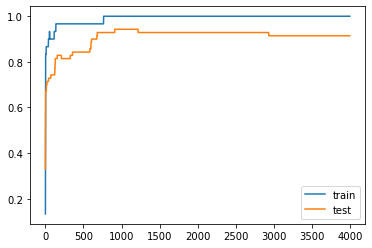

In [15]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()    

Train: 1.000, Test: 0.943


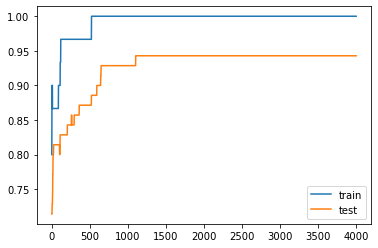

In [16]:
# mlp overfit on the moons dataset with a unit norm constraint
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import unit_norm
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm()))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()